## Import Library

In [1]:
import os
import cv2
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

## Load Data

In [2]:
base_dir = 'FaceMask-Dataset'
categories = ['with_mask', 'without_mask']
labels = [i for i in range (len(categories))]
label_dict = dict(zip(categories, labels))

print(categories)
print(labels)
print(label_dict)

['with_mask', 'without_mask']
[0, 1]
{'with_mask': 0, 'without_mask': 1}


## Data Preprocessing

In [3]:
img_size=100
data=[]
target=[]

for category in categories:
    path=os.path.join(base_dir,category)
    img_names=os.listdir(path)
        
    for img_name in img_names:
        img_path=os.path.join(path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e) 

In [4]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
target=np_utils.to_categorical(target)

In [5]:
data

array([[[[0.80784314],
         [0.81176471],
         [0.81176471],
         ...,
         [0.80392157],
         [0.80392157],
         [0.8       ]],

        [[0.80392157],
         [0.80392157],
         [0.81568627],
         ...,
         [0.80392157],
         [0.80784314],
         [0.80784314]],

        [[0.80784314],
         [0.81176471],
         [0.81568627],
         ...,
         [0.80784314],
         [0.80784314],
         [0.80392157]],

        ...,

        [[0.81568627],
         [0.80392157],
         [0.81568627],
         ...,
         [0.80784314],
         [0.80392157],
         [0.81176471]],

        [[0.80392157],
         [0.80392157],
         [0.81176471],
         ...,
         [0.80392157],
         [0.80392157],
         [0.81176471]],

        [[0.79607843],
         [0.80784314],
         [0.80784314],
         ...,
         [0.81176471],
         [0.80784314],
         [0.79215686]]],


       [[[0.80784314],
         [0.81176471],
         [0.81

In [6]:
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Modelling and compile 

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu',  input_shape=data.shape[1:]),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dropout (Dropout)           (None, 33856)             0

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Split Data

In [10]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2, random_state=1)

In [11]:
print('Jumlah train_data :', len(train_data))
print('Jumlah train_target :', len(train_target))
print('Jumlah test_data :', len(test_data))
print('Jumlah test_target :', len(test_target))

Jumlah train_data : 8000
Jumlah train_target : 8000
Jumlah test_data : 2000
Jumlah test_target : 2000


## Training

In [12]:
history=model.fit(train_data,
                  train_target,
                  epochs=10,
                  validation_split=0.2
                  )

Epoch 1/10
200/200 [==============================] - 61s 248ms/step - loss: 0.3752 - accuracy: 0.8322 - val_loss: 0.2430 - val_accuracy: 0.8969
Epoch 2/10
200/200 [==============================] - 49s 245ms/step - loss: 0.2043 - accuracy: 0.9230 - val_loss: 0.1752 - val_accuracy: 0.9344
Epoch 3/10
200/200 [==============================] - 49s 245ms/step - loss: 0.1636 - accuracy: 0.9392 - val_loss: 0.1520 - val_accuracy: 0.9450
Epoch 4/10
200/200 [==============================] - 48s 240ms/step - loss: 0.1267 - accuracy: 0.9536 - val_loss: 0.1314 - val_accuracy: 0.9594
Epoch 5/10
200/200 [==============================] - 49s 244ms/step - loss: 0.1081 - accuracy: 0.9597 - val_loss: 0.1297 - val_accuracy: 0.9613
Epoch 6/10
200/200 [==============================] - 49s 247ms/step - loss: 0.0900 - accuracy: 0.9666 - val_loss: 0.1388 - val_accuracy: 0.9525
Epoch 7/10
200/200 [==============================] - 49s 245ms/step - loss: 0.0717 - accuracy: 0.9745 - val_loss: 0.1166 - val_ac

## Plot Accuracy and Loss 

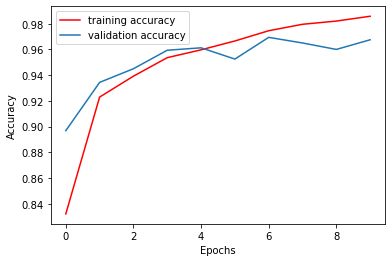

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

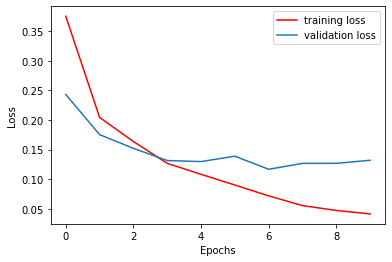

In [14]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate and Save Model

In [15]:
print(model.evaluate(test_data,test_target))

63/63 [==============================] - 3s 49ms/step - loss: 0.1574 - accuracy: 0.9585
[0.15740954875946045, 0.9585000276565552]


1/1 [==============================] - 0s 19ms/step
With Mask


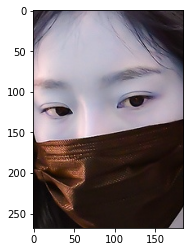

In [25]:
image = cv2.imread('wm3.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(image)
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)

label=np.argmax(result,axis=1)[0]
if label==0:
    print ('With Mask')
else:
    print ('Without Mask')

In [26]:
model.save('facemask-detection-model.h5')